<h1>Task 2.1 - Damage Classifer</h1>

---

Author: Mohit Tukaram Kumbhare





In [2]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
import os

<h1>Importing Image</h1>

In [3]:
img = image.load_img('/content/drive/MyDrive/CarScan/data1a/training/00-damage/0001.JPEG')

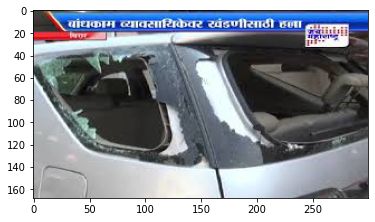

In [4]:
plt.imshow(img)

<h1>Checking Range Of Rgb</h1>

In [5]:
cv2.imread('/content/drive/MyDrive/CarScan/data1a/training/00-damage/0001.JPEG')

array([[[ 59,  70,  68],
        [ 59,  72,  64],
        [ 61,  74,  58],
        ...,
        [191, 172, 151],
        [190, 171, 150],
        [190, 171, 150]],

       [[ 59,  70,  67],
        [ 59,  72,  64],
        [ 61,  73,  61],
        ...,
        [111,  77,  48],
        [111,  77,  48],
        [110,  76,  47]],

       [[ 60,  71,  61],
        [ 60,  71,  63],
        [ 62,  67,  68],
        ...,
        [171, 103,  60],
        [171, 103,  60],
        [170, 102,  59]],

       ...,

       [[161, 161, 161],
        [158, 158, 158],
        [165, 165, 165],
        ...,
        [ 59,  59,  59],
        [ 63,  63,  63],
        [ 67,  67,  67]],

       [[162, 162, 162],
        [159, 159, 159],
        [168, 168, 168],
        ...,
        [ 66,  66,  66],
        [ 70,  70,  70],
        [ 74,  74,  74]],

       [[162, 162, 162],
        [160, 160, 160],
        [169, 169, 169],
        ...,
        [ 71,  71,  71],
        [ 76,  76,  76],
        [ 80,  80,  80]]

<h1>Checking Height and Width</h1>

In [6]:
cv2.imread('/content/drive/MyDrive/CarScan/data1a/training/00-damage/0001.JPEG').shape

(168, 300, 3)

<h1>Rescaling Image Rgb</h1>
Rescaling Range of rgb so we get range from 0 to 1

In [7]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

<h1>Training DataSet & Validation DataSet</h1>
Here Rescaling the image to 200 by 200 and taking batch size of 100 (Means one backward propagation after 100 data point passes)

In [8]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/CarScan/data1a/training',
                                          target_size = (200,200),
                                          batch_size = 100,
                                          class_mode = 'binary')

Found 1840 images belonging to 2 classes.


In [9]:
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/CarScan/data1a/validation',
                                          target_size = (200,200),
                                          batch_size = 100,
                                          class_mode = 'binary')

Found 460 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'00-damage': 0, '01-whole': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

<h1>Convolutional Neural Network Max Pooling</h1>

Using Relu Activation Function in hidden layers while sigmod in output layer

In [12]:
model = Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200, 200, 3)),
                    tf.keras.layers.MaxPool2D(2,2),
                    #
                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                    tf.keras.layers.MaxPool2D(2,2),
                    #
                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                    tf.keras.layers.MaxPool2D(2,2),

                    #
                    tf.keras.layers.Flatten(),

                    #
                    tf.keras.layers.Dense(512, activation='relu'),
                    tf.keras.layers.Dense(1, activation='sigmoid')

])

As It is a example of binary classification hence using binary crossentropy and in optimizer using adam optimizer

In [13]:
model.compile(loss = 'binary_crossentropy', optimizer="adam", metrics = ['accuracy'])

here taking 20 epoch (1 epoch means data point atleast pass one time in a neural network)

In [14]:
model_fit = model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20
19/19 [==============================] - 341s 18s/step - loss: 0.8501 - accuracy: 0.5011 - val_loss: 0.6774 - val_accuracy: 0.5022
Epoch 2/20
19/19 [==============================] - 16s 849ms/step - loss: 0.6464 - accuracy: 0.5957 - val_loss: 0.5969 - val_accuracy: 0.6804
Epoch 3/20
19/19 [==============================] - 16s 846ms/step - loss: 0.5500 - accuracy: 0.7234 - val_loss: 0.5376 - val_accuracy: 0.7174
Epoch 4/20
19/19 [==============================] - 16s 852ms/step - loss: 0.4816 - accuracy: 0.7728 - val_loss: 0.5341 - val_accuracy: 0.7413
Epoch 5/20
19/19 [==============================] - 16s 832ms/step - loss: 0.4173 - accuracy: 0.8223 - val_loss: 0.4921 - val_accuracy: 0.7500
Epoch 6/20
19/19 [==============================] - 16s 830ms/step - loss: 0.3289 - accuracy: 0.8685 - val_loss: 0.4714 - val_accuracy: 0.7696
Epoch 7/20
19/19 [==============================] - 16s 832ms/step - loss: 0.2626 - accuracy: 0.8935 - val_loss: 0.4890 - val_accuracy: 0.7522


<h1>Testing</h1>

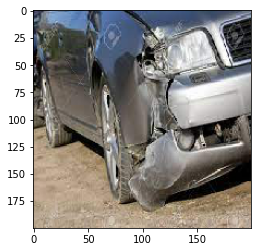

damage


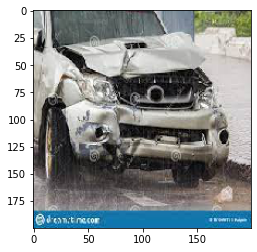

damage


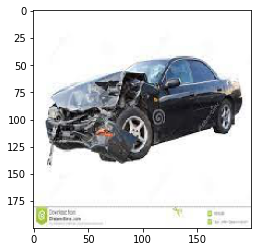

whole


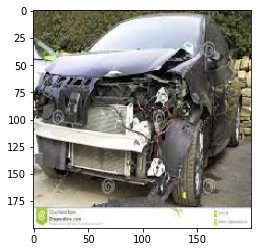

damage


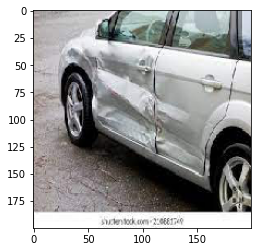

damage


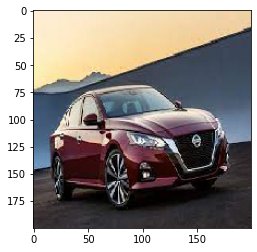

whole


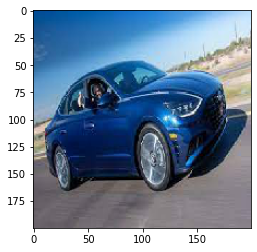

damage


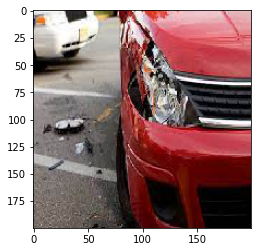

damage


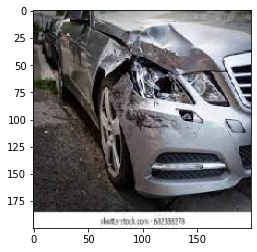

damage


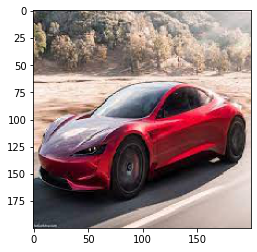

whole


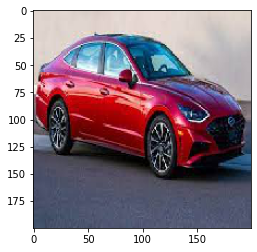

whole


In [33]:
dir_path = '/content/drive/MyDrive/CarScan/data1a/testing'
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size = (200,200))
  plt.imshow(img)
  plt.show()
  X = image.img_to_array(img)
  X = np.expand_dims(X, axis = 0)

  images = np.vstack([X])
  val = model.predict(images)

  if val == 0:
    print('damage')
  else:
    print('whole')